In [1]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics

#machine learning algorithms to be used
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

from sklearn.cluster import KMeans

#for showing decision tree
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus
%matplotlib inline  

/Users/ushatripuramallu/anaconda3/lib/python3.6/site-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


In [2]:
#load the data set
Breast_Cancer_Data = pd.read_csv('data.csv')

#clean data
Breast_Cancer_Data = Breast_Cancer_Data.drop(columns=['id', 'Unnamed: 32'])

#columns present for analysis
for col in Breast_Cancer_Data.columns:
    print(col)
print(len(Breast_Cancer_Data.columns))

diagnosis
radius_mean
texture_mean
perimeter_mean
area_mean
smoothness_mean
compactness_mean
concavity_mean
concave points_mean
symmetry_mean
fractal_dimension_mean
radius_se
texture_se
perimeter_se
area_se
smoothness_se
compactness_se
concavity_se
concave points_se
symmetry_se
fractal_dimension_se
radius_worst
texture_worst
perimeter_worst
area_worst
smoothness_worst
compactness_worst
concavity_worst
concave points_worst
symmetry_worst
fractal_dimension_worst
31


In [3]:
#view the data set
Breast_Cancer_Data

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [4]:
Breast_Cancer_Data['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

In [5]:
#split data into diagnosis and features
y = Breast_Cancer_Data['diagnosis']
X = Breast_Cancer_Data.drop(columns = ['diagnosis'])

#split into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

Accuracy of Linear Classifier: 0.9385964912280702
[[-1.96347947 -0.12761756  0.04053774 -0.00392614  0.11415205  0.35952047
   0.54611608  0.29119953  0.17806153  0.00910217  0.0159254  -0.91194727
   0.3175818   0.08194367  0.00528688 -0.01323847  0.01666834  0.0318715
   0.02730485 -0.00796031 -1.2445787   0.37299415  0.09284418  0.03253733
   0.18429727  1.01120874  1.33058216  0.55949237  0.51720257  0.08075975]]
[-0.42607662]
30
[[72  5]
 [ 2 35]]
Average Precision Score: 0.9928416293215294


/Users/ushatripuramallu/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Text(0.5, 0, 'Recall')

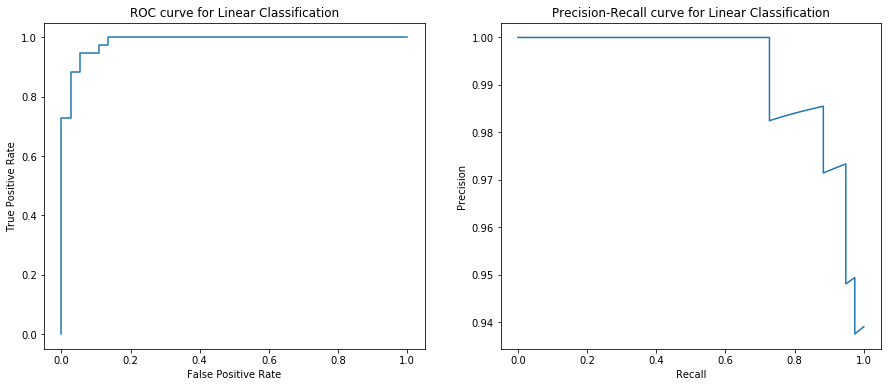

In [6]:
#create logistic regression and fit to training set
logreg = LogisticRegression()

logreg.fit(X_train, y_train)
logreg_prediction = logreg.predict(X_test)

#print accuracy of the logistic regression
logreg_score = logreg.score(X_test, y_test)
logreg_probs = logreg.predict_proba(X_test)
print("Accuracy of Linear Classifier:", metrics.accuracy_score(y_test, logreg_prediction))

#weights of each feature
print(logreg.coef_)
print(logreg.intercept_)
print(len(logreg.coef_[0]))

#gotta do some research on what the confusion matrix represets
cm = metrics.confusion_matrix(y_test, logreg_prediction)
print(cm)

lg_fpr, lg_tpr, lg_thresholds = metrics.roc_curve(y_test, logreg_probs[:,0], pos_label ='B')
lg_precision, lg_recall, _ = metrics.precision_recall_curve(y_test, logreg_probs[:, 0], pos_label='B')

print("Average Precision Score:", metrics.average_precision_score(y_test, logreg_probs[:, 0], pos_label='B'))

plt.figure(figsize=(15, 6))
plt.subplot(121)
plt.plot(lg_fpr, lg_tpr)
plt.title("ROC curve for Linear Classification")
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")

plt.subplot(122)
plt.plot(lg_recall, lg_precision)
plt.title("Precision-Recall curve for Linear Classification")
plt.ylabel("Precision")
plt.xlabel("Recall")

Accurancy of Decision Tree Classifier: 0.9649122807017544
[[75  2]
 [ 2 35]]
Average Precision Score: 0.9662704577263703


Text(0.5, 0, 'Recall')

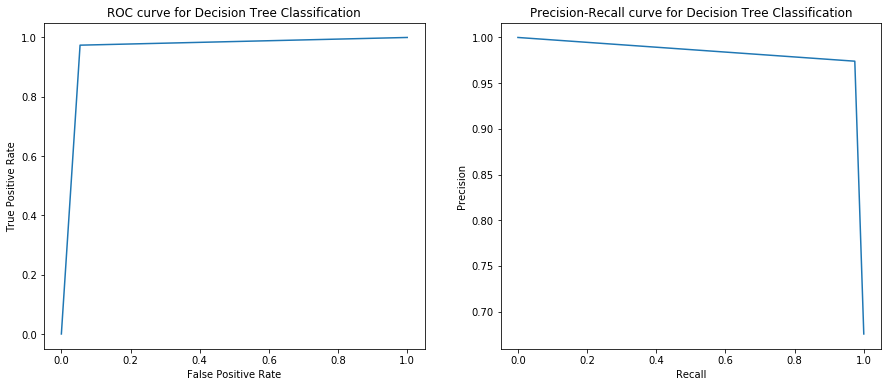

In [7]:
#run a decision tree classifier to predict cell classification 

dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)
dtree_probs = dtree.predict_proba(X_test)
dtree_predictions = dtree.predict(X_test)

print("Accurancy of Decision Tree Classifier:", metrics.accuracy_score(y_test, dtree_predictions))

cm = metrics.confusion_matrix(y_test, dtree_predictions)
print(cm)

#print the 
dot_data = StringIO()
export_graphviz(dtree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = X.columns,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('cancer.png')
Image(graph.create_png())

dtree_fpr, dtree_tpr, dtree_thresholds = metrics.roc_curve(y_test, dtree_probs[:,0], pos_label ='B')
dtree_precision, dtree_recall, _ = metrics.precision_recall_curve(y_test, dtree_probs[:, 0], pos_label='B')

print("Average Precision Score:", metrics.average_precision_score(y_test, dtree_probs[:, 0], pos_label='B'))


plt.figure(figsize=(15, 6))
plt.subplot(121)
plt.plot(dtree_fpr, dtree_tpr)
plt.title("ROC curve for Decision Tree Classification")
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")

plt.subplot(122)
plt.plot(dtree_recall, dtree_precision)
plt.title("Precision-Recall curve for Decision Tree Classification")
plt.ylabel("Precision")
plt.xlabel("Recall")

Accurancy of Random Forest Classifier: 0.9649122807017544
Average Precision Score: 0.9787669327229447
[[75  2]
 [ 2 35]]


Text(0.5, 0, 'Recall')

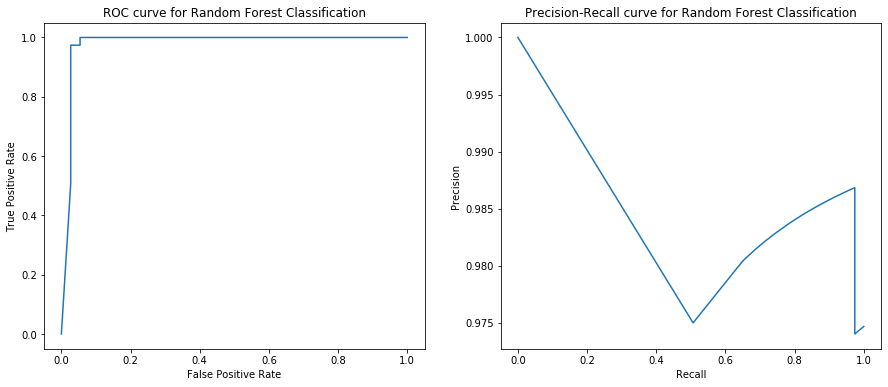

In [8]:
#run Random Forest Classifier to predict cell classification 
rf = RandomForestClassifier(n_estimators = 100)
rf.fit(X_train, y_train)
rf_predictions = rf.predict(X_test)
rf_probs = rf.predict_proba(X_test)

print("Accurancy of Random Forest Classifier:", metrics.accuracy_score(y_test, rf_predictions))
rf_fpr, rf_tpr, rf_thresholds = metrics.roc_curve(y_test, rf_probs[:,0], pos_label ='B')
rf_precision, rf_recall, _ = metrics.precision_recall_curve(y_test, rf_probs[:, 0], pos_label='B')

print("Average Precision Score:", metrics.average_precision_score(y_test, rf_probs[:, 0], pos_label='B'))

cm = metrics.confusion_matrix(y_test, rf_predictions)
print(cm)

plt.figure(figsize=(15, 6))
plt.subplot(121)
plt.plot(rf_fpr, rf_tpr)
plt.title("ROC curve for Random Forest Classification")
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")

plt.subplot(122)
plt.plot(rf_recall, rf_precision)
plt.title("Precision-Recall curve for Random Forest Classification")
plt.ylabel("Precision")
plt.xlabel("Recall")

Accurancy of SVC: 0.6754385964912281
Average Precision Score: 0.9611541947432197
[[77  0]
 [37  0]]


/Users/ushatripuramallu/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Text(0.5, 0, 'Recall')

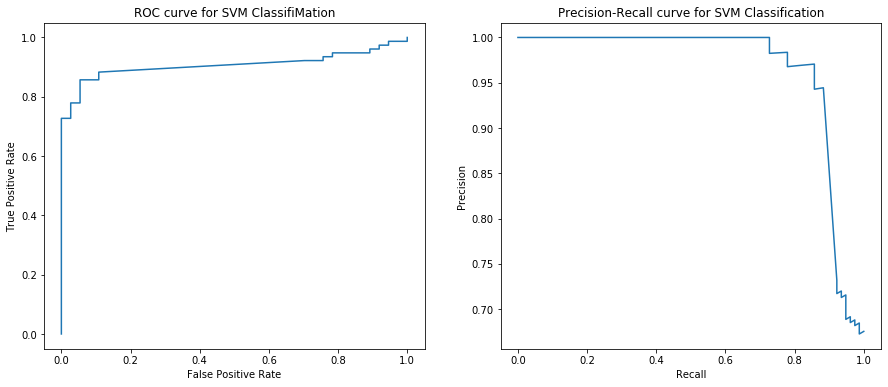

In [9]:
#run support vector classifier to predict cell classification
svc = SVC(probability=True)
svc.fit(X_train, y_train)
svc_predictions = svc.predict(X_test)
svc_probs = svc.predict_proba(X_test)


print("Accurancy of SVC:", metrics.accuracy_score(y_test, svc_predictions))
svc_fpr, svc_tpr, svc_thresholds = metrics.roc_curve(y_test, svc_probs[:,0], pos_label ='B')
svc_precision, svc_recall, _ = metrics.precision_recall_curve(y_test, svc_probs[:, 0], pos_label='B')

print("Average Precision Score:", metrics.average_precision_score(y_test, svc_probs[:, 0], pos_label='B'))



cm = metrics.confusion_matrix(y_test, svc_predictions)
print(cm)

plt.figure(figsize=(15, 6))
plt.subplot(121)
plt.plot(svc_fpr, svc_tpr)
plt.title("ROC curve for SVM ClassifiMation")
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")

plt.subplot(122)
plt.plot(svc_recall, svc_precision)
plt.title("Precision-Recall curve for SVM Classification")
plt.ylabel("Precision")
plt.xlabel("Recall")

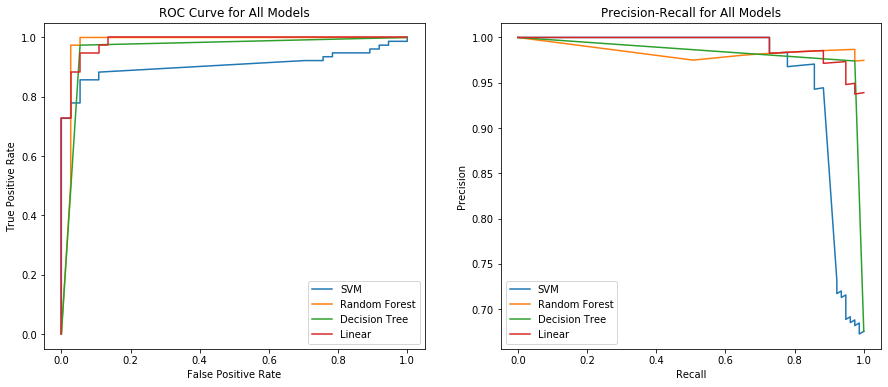

In [10]:
plt.figure(figsize=(15, 6))
plt.subplot(121)
plt.plot(svc_fpr, svc_tpr, label = "SVM")
plt.plot(rf_fpr, rf_tpr, label = "Random Forest")
plt.plot(dtree_fpr, dtree_tpr, label = "Decision Tree")
plt.plot(lg_fpr, lg_tpr, label = "Linear")
plt.legend()
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.title("ROC Curve for All Models")

plt.subplot(122)
plt.plot(svc_recall, svc_precision, label = "SVM")
plt.plot(rf_recall, rf_precision, label = "Random Forest")
plt.plot(dtree_recall, dtree_precision, label = "Decision Tree")
plt.plot(lg_recall, lg_precision, label = "Linear")
plt.ylabel("Precision")
plt.xlabel("Recall")
plt.title("Precision-Recall for All Models")
plt.legend()

In [11]:
print("AUC SVC:", metrics.roc_auc_score(y_test, svc_probs[:, 0]))
print("AUC RF:", metrics.roc_auc_score(y_test, rf_probs[:, 0]))
print("AUC DTREE:", metrics.roc_auc_score(y_test, dtree_probs[:, 0]))
print("AUC LINEAR:", metrics.roc_auc_score(y_test, logreg_probs[:, 0]))

AUC SVC: 0.09301509301509304
AUC RF: 0.020884520884520887
AUC DTREE: 0.04001404001404002
AUC LINEAR: 0.014040014040014042
